In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import tensorflow as tf

In [2]:
#train data
df = pd.read_csv("./fashionmnist/fashion-mnist_train.csv")
#test data
df_test = pd.read_csv("./fashionmnist/fashion-mnist_test.csv")

In [3]:
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
fashion_mnist_labels = {
    0: "T-shirt/top",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle boot"
}

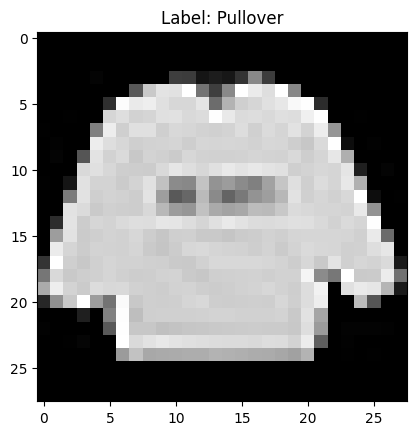

In [5]:
image = df.iloc[0, 1:].to_numpy().reshape(28, 28) # Reshape into 28x28 pixels
image_label = fashion_mnist_labels[df.iloc[0, 0]]

plt.imshow(image, cmap='gray')
plt.title(f"Label: {image_label}")
plt.show()

In [6]:
#Normalize pixel values
X = df.iloc[:, 1:] / 255.0
y = df.iloc[:, 0]

X_test = df_test.iloc[:, 1:] / 255.0
y_test = df_test.iloc[:, 0]

In [7]:
#Reshape data to fit CNN model
X = X.values.reshape(-1, 28, 28, 1)
X_test = X_test.values.reshape(-1, 28, 28, 1)

In [8]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
y_test = label_encoder.transform(y_test)

In [9]:
# Split data into training, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Display dataset shapes
print("X_train shape:", X_train.shape)
print("X_val shape:", X_val.shape)
print("X_test shape:", X_test.shape)
print("===================================")
print("y_train shape:", y_train.shape)
print("y_val shape:", y_val.shape)
print("y_test shape:", y_test.shape)

X_train shape: (38400, 28, 28, 1)
X_val shape: (9600, 28, 28, 1)
X_test shape: (12000, 28, 28, 1)
y_train shape: (38400,)
y_val shape: (9600,)
y_test shape: (12000,)


In [10]:
#CNN model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Dropout(0.25),


    tf.keras.layers.Flatten(),
    # tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax')
])

c:\Users\efe44\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [12]:
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val))

Epoch 1/50
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 63s 50ms/step - accuracy: 0.6815 - loss: 0.9518 - val_accuracy: 0.8418 - val_loss: 0.4211
Epoch 2/50
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 55s 46ms/step - accuracy: 0.8416 - loss: 0.4422 - val_accuracy: 0.8665 - val_loss: 0.3622
Epoch 3/50
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 53s 44ms/step - accuracy: 0.8608 - loss: 0.3806 - val_accuracy: 0.8879 - val_loss: 0.3034
Epoch 4/50
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 53s 44ms/step - accuracy: 0.8748 - loss: 0.3529 - val_accuracy: 0.8975 - val_loss: 0.2890
Epoch 5/50
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 54s 45ms/step - accuracy: 0.8829 - loss: 0.3219 - val_accuracy: 0.9022 - val_loss: 0.2741
Epoch 6/50
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 55s 46ms/step - accuracy: 0.8889 - loss: 0.3110 - val_accuracy: 0.9056 - val_loss: 0.2612
Epoch 7/50
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 54s 45ms/step - accuracy: 0.8979 - loss: 0.2876 - val_accuracy: 0.9123 - val_loss: 0.2504
Epoch 8/50
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 54s 45ms/step - accuracy: 0.8997 -

In [13]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9317 - loss: 0.2135
Test accuracy: 0.9309166669845581


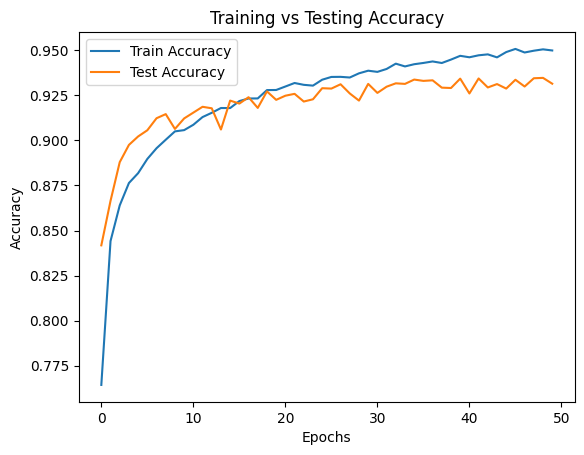

In [14]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs Testing Accuracy')
plt.show()